<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,0.000078,220.649500,220.649549,-0.000049
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-0.000333,239.832073,239.832417,-0.000344
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-0.002024,236.133265,236.135229,-0.001963
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-0.000121,257.483400,257.483380,0.000019
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,0.000293,268.785060,268.784753,0.000307
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-0.000470,202.587938,202.588388,-0.000450
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,0.000170,266.421712,266.421620,0.000092
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-0.000042,329.076123,329.076227,-0.000104
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-0.000269,294.371786,294.372005,-0.000218


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,0.000078,220.649500,220.649549,-0.000049
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-0.000333,239.832073,239.832417,-0.000344
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-0.002024,236.133265,236.135229,-0.001963
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-0.000121,257.483400,257.483380,0.000019
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,0.000293,268.785060,268.784753,0.000307
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-0.000470,202.587938,202.588388,-0.000450
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,0.000170,266.421712,266.421620,0.000092
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-0.000042,329.076123,329.076227,-0.000104
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-0.000269,294.371786,294.372005,-0.000218


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,0.000078,220.649500,220.649549,-0.000049
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-0.000333,239.832073,239.832417,-0.000344
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-0.002024,236.133265,236.135229,-0.001963
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-0.000121,257.483400,257.483380,0.000019
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,0.000293,268.785060,268.784753,0.000307
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-0.000470,202.587938,202.588388,-0.000450
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,0.000170,266.421712,266.421620,0.000092
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-0.000042,329.076123,329.076227,-0.000104
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-0.000269,294.371786,294.372005,-0.000218


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

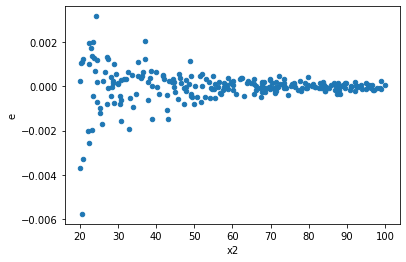

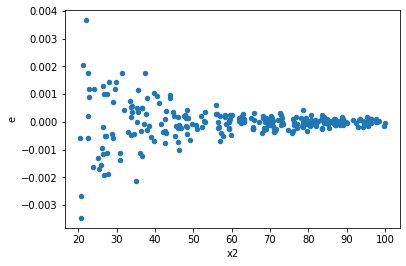

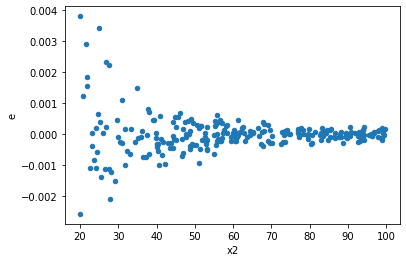

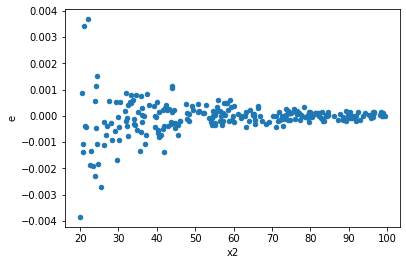

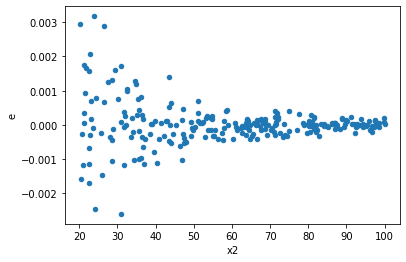

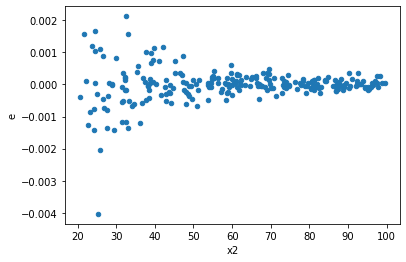

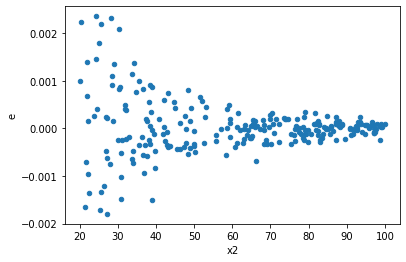

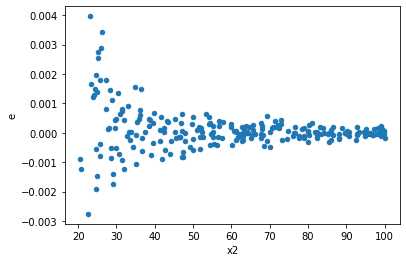

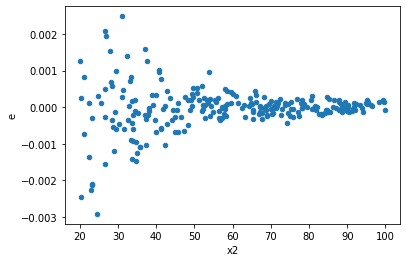

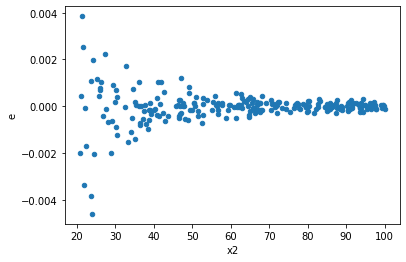

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
230.0,96.0,96.0,4.011711543459132e-05,4.072309528549489e-05,4.178866191103262e-07,4.241989092239051e-07,1.0151052697667555,0.9416026308134018,0.5291986845932991,0.4708013154067009,Reject005=1 : Homoscedasticity
692.0,96.0,96.0,4.220049081214712e-05,4.6162919746146116e-05,4.3958844595986584e-07,4.808637473556887e-07,1.0938953281760988,0.6610657405552103,0.6694671297223949,0.33053287027760514,Reject005=1 : Homoscedasticity
743.0,96.0,96.0,4.0689778624215304e-05,5.202121874474848e-05,4.2385186066890943e-07,5.418876952577967e-07,1.2784837004197809,0.23055706354188943,0.8847214682290553,0.11527853177094471,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,7.029072568427898e-05,2.1635722806098356e-05,7.321950592112394e-07,2.2537211256352453e-07,0.30780337797732166,2.1046339362984813e-08,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,6.769690583721086e-05,2.017612520436164e-05,7.051761024709465e-07,2.101679708787671e-07,0.2980361503209421,9.01077724603265e-09,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,7.951949103456693e-05,9.619577554846637e-06,8.283280316100721e-07,1.002039328629858e-07,0.12097131696510773,1.3155123979414413e-21,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,5.845713135249713e-05,2.0701106139819624e-05,6.089284515885118e-07,2.1563652228978776e-07,0.3541245637763463,6.860887010314996e-07,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,5.810173884914894e-05,1.7315509790340976e-05,6.052264463453015e-07,1.8036989364938517e-07,0.29802050908145256,8.99822013102414e-09,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,5.505561870873881e-05,6.037137854464796e-06,5.734960282160293e-07,6.288685265067497e-08,0.10965525401509184,3.0557800247765405e-23,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,4.1824254374932154e-05,1.2925415155523861e-05,4.3566931640554327e-07,1.3463974120337354e-07,0.3090411377009713,2.3361810768235514e-08,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,6.679614310129922e-05,1.662988608182797e-05,6.957931573052002e-07,1.7322798001904135e-07,0.2489647651752592,5.857837220520363e-11,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,6.344510993773929e-05,8.20520017848461e-06,6.608865618514509e-07,8.547083519254801e-08,0.12932754291917273,1.6180828955229218e-20,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    972
Reject005=1 : Homoscedasticity       28
Name: Result_test, dtype: int64